# How Accessible is Publicly Available Braodband in Los Angeles?
#### Michael Criste |  Fall 2021  |  Midterm

## Project Proposal
revisit initial [proposal here](https://github.com/cristemc/project_proposal) and update to reflect current ideas and deliverables.

How accessible is publicly available broadband access? Federal, state, and local governemnts leverage billions of dollars and partnerships with private-industry partners to make broadband more accessible and increase adoption rates at home. These programs often fund publicly accessible broadband through public schools and libraries to aid children and their families to get online in an effort to increase educational outcomes leading to more economic opportunities. A primary example is the FCC's E-RATE universal services program, which provides funds for obtaining and implementing broadband in school and libraries across urban and rural disctricts. In addition to these access points, private businesses often provide free wifi to customers. Dispite the many access points, challenges still exist: including hours of operation, transportation, location (and weather exposure), device availability, and purchase requirements.

### Why it Matters

As our society has moved online, we have begun the process of reproducing the current systems of inequality into the digital dimension. This is demonstrated by current broadband adoption rates and academic performance seen across income levels and racial groups. Some may suggest that the solution is as simple as giving every student a wifi-enabled laptop, but this far from a solution to a problem that exists within an interconnected ecosystem of hurdles built on current trends of oppression. In most surveys regarding broadband access, respondents often cite the high cost of fixed broadband access as the top deterrent. In addition to the monthly cost of service, there are additional fees and taxes and cost of devices (including computers, routers, etc.). In an article from the Washington Center for Equitable Growth found that 31.4 percent of household with an annual income lower than $50,000 with school-aged children lacked broadband access in their homes. Furthermore, regardless of income levels Black and Latinx children disproportionately lack access when compared to white and Asian children (Crampton, 2018). This creates a homework gap between those who have access at home to support their studies, and those who do not (Yankelevich et al., 2017). Considering that 94 percent of all school districts serving low-income students report assigning internet-based homeowrk (Shapiro, 2015), the need for broadband becomes alarming clear.

### Spatial Scope

Census tracts within the City of Los Angeles

### Data Sources

2019 American Community Survey from Census Reporter and LA City Open Data

### Goals and Intentions 

After first identifying communities with an outstanding percentage of residents who completely lack internet access and those with limited access, I will then map the public access points in relation to these communtiies to assess the proximity and quality of resources through distance, available services (available computers, hotspot loan program, etc.), and populations served.

## Data Exploration
The first portion of this exploration will focus on the cleaning and formatting the data. *expand further*

In [1]:
#First, I'll begin by importing the libaries I am likely to use to clean, process, and visualize the data.

#for data processing
import pandas as pd
import numpy as np

#for spatial data
import geopandas as gpd

#for mapping
import contextily as ctx
import osmnx as ox
import networkx as nx

#for dataviz
import matplotlib.pyplot as plt
import plotly.express as px

#for data retrieval
from sodapy import socrata

In [2]:
#Next, the data will be uploaded

#age variable
age = gpd.read_file('data/acs2019_1yr_B28005_16000US0644000.geojson')

#educ varaible
educ = gpd.read_file('data/acs2019_1yr_B28006_16000US0644000.geojson')

#race variable
race = gpd.read_file('data/acs2019_1yr_B28009_all races-b.csv')

#household subscription status
hh = gpd.read_file('data/acs2019_5yr_B28002_14000US06037293306.geojson')

#libraries within LA City 
lib = gpd.read_file('data/LA_Library_Map.csv')

In [3]:
# Understand the data
age.info()
educ.info()
race.info()
hh.info()
lib.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1 non-null      object  
 1   name              1 non-null      object  
 2   B28005001         1 non-null      float64 
 3   B28005001, Error  1 non-null      float64 
 4   B28005002         1 non-null      float64 
 5   B28005002, Error  1 non-null      float64 
 6   B28005003         1 non-null      float64 
 7   B28005003, Error  1 non-null      float64 
 8   B28005004         1 non-null      float64 
 9   B28005004, Error  1 non-null      float64 
 10  B28005005         1 non-null      float64 
 11  B28005005, Error  1 non-null      float64 
 12  B28005006         1 non-null      float64 
 13  B28005006, Error  1 non-null      float64 
 14  B28005007         1 non-null      float64 
 15  B28005007, Error  1 non-null      float64 
 16  B28005008         1 no

In [4]:
#simplify the available data and rename columns for processing. I am going to skip this step for race because I compiled the individual tables from census reporter in excel to save some time.

#age first
age_col2keep = ['geoid',
     'name',
     'B28005001',
     'B28005002',
     'B28005003',
     'B28005004',
     'B28005005',
     'B28005006',
     'B28005007',
     'B28005008',
     'B28005009',
     'B28005010',
     'B28005011',
     'B28005012',
     'B28005013',
     'B28005014',
     'B28005015',
     'B28005016',
     'B28005017',
     'B28005018',
     'B28005019',
     'geometry']
list(age_col2keep)

['geoid',
 'name',
 'B28005001',
 'B28005002',
 'B28005003',
 'B28005004',
 'B28005005',
 'B28005006',
 'B28005007',
 'B28005008',
 'B28005009',
 'B28005010',
 'B28005011',
 'B28005012',
 'B28005013',
 'B28005014',
 'B28005015',
 'B28005016',
 'B28005017',
 'B28005018',
 'B28005019',
 'geometry']

In [5]:
#next, education
educ_col2keep = ['geoid',
     'name',
     'B28006001',
     'B28006002',
     'B28006003',
     'B28006004',
     'B28006005',
     'B28006006',
     'B28006007',
     'B28006008',
     'B28006009',
     'B28006010',
     'B28006011',
     'B28006012',
     'B28006013',
     'B28006014',
     'B28006015',
     'B28006016',
     'B28006017',
     'B28006018',
     'B28006019',
     'geometry']

In [6]:
#same step for houehold data
list(hh)

['geoid',
 'name',
 'B28002001',
 'B28002001, Error',
 'B28002002',
 'B28002002, Error',
 'B28002003',
 'B28002003, Error',
 'B28002004',
 'B28002004, Error',
 'B28002005',
 'B28002005, Error',
 'B28002006',
 'B28002006, Error',
 'B28002007',
 'B28002007, Error',
 'B28002008',
 'B28002008, Error',
 'B28002009',
 'B28002009, Error',
 'B28002010',
 'B28002010, Error',
 'B28002011',
 'B28002011, Error',
 'B28002012',
 'B28002012, Error',
 'B28002013',
 'B28002013, Error',
 'geometry']

In [7]:
hh_col2keep = ['geoid',
 'name',
 'B28002001',
 'B28002002',
 'B28002003',
 'B28002004',
 'B28002005',
 'B28002006',
 'B28002007',
 'B28002008',
 'B28002009',
 'B28002010',
 'B28002011',
 'B28002012',
 'B28002013',
 'geometry']

In [8]:
age = age[age_col2keep]
list(age)

['geoid',
 'name',
 'B28005001',
 'B28005002',
 'B28005003',
 'B28005004',
 'B28005005',
 'B28005006',
 'B28005007',
 'B28005008',
 'B28005009',
 'B28005010',
 'B28005011',
 'B28005012',
 'B28005013',
 'B28005014',
 'B28005015',
 'B28005016',
 'B28005017',
 'B28005018',
 'B28005019',
 'geometry']

In [9]:
educ = educ[educ_col2keep]
list(age)

['geoid',
 'name',
 'B28005001',
 'B28005002',
 'B28005003',
 'B28005004',
 'B28005005',
 'B28005006',
 'B28005007',
 'B28005008',
 'B28005009',
 'B28005010',
 'B28005011',
 'B28005012',
 'B28005013',
 'B28005014',
 'B28005015',
 'B28005016',
 'B28005017',
 'B28005018',
 'B28005019',
 'geometry']

In [10]:
hh = hh[hh_col2keep]
list(hh)

['geoid',
 'name',
 'B28002001',
 'B28002002',
 'B28002003',
 'B28002004',
 'B28002005',
 'B28002006',
 'B28002007',
 'B28002008',
 'B28002009',
 'B28002010',
 'B28002011',
 'B28002012',
 'B28002013',
 'geometry']

In [11]:
age.columns = ['geoid',
 'name',
 'Total',
 'Under 18 years',
 '<18, Has a computer',
 '<18, With dial-up Internet subscription alone',
 '<18, With a broadband Internet subscription',
 '<18, Without an Internet subscription',
 '<18, No computer',
 '18 to 64 years',
 '18-64, Has a computer',
 '18-64, With dial-up Internet subscription alone',
 '18-64, With a broadband Internet subscription',
 '18-64, Without an Internet subscription',
 '18-64, No computer',
 '65 years and over',
 '65, Has a computer',
 '65, With dial-up Internet subscription alone',
 '65, With a broadband Internet subscription',
 '65, Without an Internet subscription',
 '65, No computer',
 'geometry']
age.head()

geoid             name      Total  Under 18 years  \
0  16000US0644000  Los Angeles, CA  3885625.0        800901.0   

   <18, Has a computer  <18, With dial-up Internet subscription alone  \
0             788025.0                                          222.0   

   <18, With a broadband Internet subscription  \
0                                     745718.0   

   <18, Without an Internet subscription  <18, No computer  18 to 64 years  \
0                                42085.0           12876.0       2578959.0   

   ...  18-64, With a broadband Internet subscription  \
0  ...                                      2378932.0   

   18-64, Without an Internet subscription  18-64, No computer  \
0                                 145935.0             52365.0   

   65 years and over  65, Has a computer  \
0           505765.0            434466.0   

   65, With dial-up Internet subscription alone  \
0                                        1549.0   

   65, With a broadband Internet subscription  \
0                                    388032.0   

   65, Without an Internet subscription  65, No computer  \
0                               44885.0          71299.0   

                                            geometry  
0  MULTIPOLYGON (((-118.66818 34.18987, -118.6681...  

[1 rows x 22 columns]

In [12]:
educ.columns=['geoid',
 'name',
 'Total',
 'Less than high school graduate or equivalency',
 '<HS, Has a computer',
 '<HS, With dial-up Internet subscription alone',
 '<HS, With a broadband Internet subscription',
 '<HS, Without an Internet subscription',
 '<HS, No computer',
 "High school graduate (includes equivalency), some college or associate's degree",
 '>HS, Has a computer',
 '>HS, With dial-up Internet subscription alone',
 '>HS, With a broadband Internet subscription',
 '>HS, Without an Internet subscription',
 '>HS, No computer',
 "Bachelor's degree or higher",
 '>Bach, Has a computer',
 '>Bach, With dial-up Internet subscription alone',
 '>Bach, With a broadband Internet subscription',
 '>Bach, Without an Internet subscription',
 '>Bach, No computer',
 'geometry']
educ.head()

geoid             name      Total  \
0  16000US0644000  Los Angeles, CA  2728694.0   

   Less than high school graduate or equivalency  <HS, Has a computer  \
0                                       584784.0             533424.0   

   <HS, With dial-up Internet subscription alone  \
0                                          531.0   

   <HS, With a broadband Internet subscription  \
0                                     467300.0   

   <HS, Without an Internet subscription  <HS, No computer  \
0                                65593.0           51360.0   

   High school graduate (includes equivalency), some college or associate's degree  \
0                                          1154728.0                                 

   ...  >HS, With a broadband Internet subscription  \
0  ...                                    1024262.0   

   >HS, Without an Internet subscription  >HS, No computer  \
0                                75978.0           52878.0   

   Bachelor's degree or higher  >Bach, Has a computer  \
0                     989182.0               973551.0   

   >Bach, With dial-up Internet subscription alone  \
0                                            905.0   

   >Bach, With a broadband Internet subscription  \
0                                       943721.0   

   >Bach, Without an Internet subscription  >Bach, No computer  \
0                                  28925.0             15631.0   

                                            geometry  
0  MULTIPOLYGON (((-118.66818 34.18987, -118.6681...  

[1 rows x 22 columns]

In [13]:
hh.columns = ['geoid',
 'name',
 'Total',
 'With an Internet Subscription',
 'Dial-up with no other type of Internet',
 'Broadband of any type',
 'Cellular data plan',
 'Cellular data plan with no other type of Internet subscription',
 'Broadband such as cable, fiber optic or DSL',
 'Broadband such as cable, fiber optic or DSL with no other type of Internet subscription',
 'Satellite Internet service',
 'Satellite Internet service with no other type of Internet subscription',
 'Other service with no other type of Internet subscription',
 'Internet access without a subscription',
 'No Internet access',
 'geometry']
hh.head()

geoid                                   name   Total  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1575.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1312.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2297.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1357.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  1445.0   

   With an Internet Subscription  Dial-up with no other type of Internet  \
0                         1223.0                                     0.0   
1                         1095.0                                    12.0   
2                         1687.0                                     0.0   
3                         1017.0                                     0.0   
4                         1185.0                                    18.0   

   Broadband of any type  Cellular data plan  \
0                 1223.0               973.0   
1                 1083.0               959.0   
2                 1687.0              1453.0   
3                 1017.0               868.0   
4                 1167.0               955.0   

   Cellular data plan with no other type of Internet subscription  \
0                                               97.0                
1                                              113.0                
2                                              113.0                
3                                              142.0                
4                                               70.0                

   Broadband such as cable, fiber optic or DSL  \
0                                       1045.0   
1                                        960.0   
2                                       1388.0   
3                                        848.0   
4                                       1080.0   

   Broadband such as cable, fiber optic or DSL with no other type of Internet subscription  \
0                                              218.0                                         
1                                              124.0                                         
2                                              182.0                                         
3                                              131.0                                         
4                                              203.0                                         

   Satellite Internet service  \
0                       108.0   
1                        97.0   
2                       196.0   
3                        44.0   
4                       100.0   

   Satellite Internet service with no other type of Internet subscription  \
0                                               21.0                        
1                                                0.0                        
2                                               33.0                        
3                                                0.0                        
4                                                0.0                        

   Other service with no other type of Internet subscription  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   Internet access without a subscription  No Internet access  \
0                                    95.0               257.0   
1                                    90.0               127.0   
2                                    72.0               538.0   
3                                    59.0               281.0   
4                                    99.0               161.0   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTI

In [14]:
# normalize the data 
age['Percent with a computer under 18 years']=age['<18, Has a computer']/age['Under 18 years']*100
age['Percent with a computer and dial-up internet subscription under 18 years']=age['<18, With dial-up Internet subscription alone']/age['Under 18 years']*100
age['Percent with a computer and broadband internet subscription under 18 years']=age['<18, With a broadband Internet subscription']/age['Under 18 years']*100
age['Percent with a computer and no internet subscription under 18 years']=age['<18, Without an Internet subscription']/age['Under 18 years']*100
age['Percent with no computer under 18 years']=age['<18, No computer']/age['Under 18 years']*100
age['Percent with a computer between 18 and 64 years']=age['<18, Has a computer']/age['18 to 64 years']*100
age['Percent with a computer and dial-up internet subscription between 18 and 64 years']=age['18-64, With dial-up Internet subscription alone']/age['18 to 64 years']*100
age['Percent with a computer and broadband internet subscription between 18 and 64 years']=age['18-64, With a broadband Internet subscription']/age['18 to 64 years']*100
age['Percent with a computer and no internet subscription between 18 and 64 years']=age['18-64, Without an Internet subscription']/age['18 to 64 years']*100
age['Percent with a no computer between 18 and 64']=age['18-64, No computer']/age['18 to 64 years']*100
age['Percent with a computer over 65 years']=age['65, Has a computer']/age['65 years and over']*100
age['Percent with a computer and dial-up internet subscription over 65 years']=age['65, With dial-up Internet subscription alone']/age['65 years and over']*100
age['Percent with a computer and broadband internet subscription over 65 years']=age['65, With a broadband Internet subscription']/age['65 years and over']*100
age['Percent with a computer and no internet subscription over 65 years']=age['65, Without an Internet subscription']/age['65 years and over']*100
age['Percent with a no computer over 65']=age['65, No computer']/age['65 years and over']*100
age.head()

geoid             name      Total  Under 18 years  \
0  16000US0644000  Los Angeles, CA  3885625.0        800901.0   

   <18, Has a computer  <18, With dial-up Internet subscription alone  \
0             788025.0                                          222.0   

   <18, With a broadband Internet subscription  \
0                                     745718.0   

   <18, Without an Internet subscription  <18, No computer  18 to 64 years  \
0                                42085.0           12876.0       2578959.0   

   ...  Percent with a computer between 18 and 64 years  \
0  ...                                        30.555934   

   Percent with a computer and dial-up internet subscription between 18 and 64 years  \
0                                           0.066965                                   

   Percent with a computer and broadband internet subscription between 18 and 64 years  \
0                                          92.243886                                     

   Percent with a computer and no internet subscription between 18 and 64 years  \
0                                           5.658679                              

   Percent with a no computer between 18 and 64  \
0                                       2.03047   

   Percent with a computer over 65 years  \
0                              85.902741   

   Percent with a computer and dial-up internet subscription over 65 years  \
0                                           0.306269                         

   Percent with a computer and broadband internet subscription over 65 years  \
0                                          76.721798                           

   Percent with a computer and no internet subscription over 65 years  \
0                                           8.874675                    

   Percent with a no computer over 65  
0                           14.097259  

[1 rows x 37 columns]

In [15]:
educ['Percent with less than HS and has a computer']=educ['<HS, Has a computer']/educ['Less than high school graduate or equivalency']*100
educ['Percent with less than HS, has a computer with dial-up']=educ['<HS, With dial-up Internet subscription alone']/educ['Less than high school graduate or equivalency']*100
educ['Percent with less than HS, has a computer with broadband']=educ['<HS, With a broadband Internet subscription']/educ['Less than high school graduate or equivalency']*100
educ['Percent with less than HS, has a computer with no internet']=educ['<HS, Without an Internet subscription']/educ['Less than high school graduate or equivalency']*100
educ['Percent with less than HS, has no computer']=educ['<HS, No computer']/educ['Less than high school graduate or equivalency']*100
educ['Percent with more than HS and has a computer']=educ['>HS, Has a computer']/educ["High school graduate (includes equivalency), some college or associate's degree"]*100
educ['Percent with more than HS, has a computer with dial-up']=educ['>HS, With dial-up Internet subscription alone']/educ["High school graduate (includes equivalency), some college or associate's degree"]*100
educ['Percent with more than HS, has a computer with broadband']=educ['>HS, With a broadband Internet subscription']/educ["High school graduate (includes equivalency), some college or associate's degree"]*100
educ['Percent with more than HS, has a computer with no internet']=educ['>HS, Without an Internet subscription']/educ["High school graduate (includes equivalency), some college or associate's degree"]*100
educ['Percent with more than HS, has no computer']=educ['>HS, No computer']/educ["High school graduate (includes equivalency), some college or associate's degree"]*100
educ['Percent with more than Bach and has a computer']=educ['>Bach, Has a computer']/educ["Bachelor's degree or higher"]*100
educ['Percent with more than Bach, has a computer with dial-up']=educ['>Bach, With dial-up Internet subscription alone']/educ["Bachelor's degree or higher"]*100
educ['Percent with more than Bach, has a computer with broadband']=educ['>Bach, With a broadband Internet subscription']/educ["Bachelor's degree or higher"]*100
educ['Percent with more than Bach, has a computer with no internet']=educ['>Bach, Without an Internet subscription']/educ["Bachelor's degree or higher"]*100
educ['Percent with more than Bach, has no computer']=educ['>Bach, No computer']/educ["Bachelor's degree or higher"]*100
educ.head()

geoid             name      Total  \
0  16000US0644000  Los Angeles, CA  2728694.0   

   Less than high school graduate or equivalency  <HS, Has a computer  \
0                                       584784.0             533424.0   

   <HS, With dial-up Internet subscription alone  \
0                                          531.0   

   <HS, With a broadband Internet subscription  \
0                                     467300.0   

   <HS, Without an Internet subscription  <HS, No computer  \
0                                65593.0           51360.0   

   High school graduate (includes equivalency), some college or associate's degree  \
0                                          1154728.0                                 

   ...  Percent with more than HS and has a computer  \
0  ...                                      95.42074   

   Percent with more than HS, has a computer with dial-up  \
0                                           0.139427        

   Percent with more than HS, has a computer with broadband  \
0                                          88.701582          

   Percent with more than HS, has a computer with no internet  \
0                                           6.579731            

   Percent with more than HS, has no computer  \
0                                     4.57926   

   Percent with more than Bach and has a computer  \
0                                       98.419805   

   Percent with more than Bach, has a computer with dial-up  \
0                                            0.09149          

   Percent with more than Bach, has a computer with broadband  \
0                                          95.404182            

   Percent with more than Bach, has a computer with no internet  \
0                                           2.924133              

   Percent with more than Bach, has no computer  
0                                      1.580195  

[1 rows x 37 columns]

In [16]:
#to simplify the normalization process for household subscription status I will only convert those that I need for mapping
hh['Percent with an internet subscription']=hh['With an Internet Subscription']/hh['Total']*100
hh['Percent with a cellular data plan with no other type of Internet']=hh['Cellular data plan with no other type of Internet subscription']/hh['Total']*100
hh['Percent with no internet access']=hh['No Internet access']/hh['Total']*100
hh.head()

geoid                                   name   Total  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1575.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1312.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2297.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1357.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  1445.0   

   With an Internet Subscription  Dial-up with no other type of Internet  \
0                         1223.0                                     0.0   
1                         1095.0                                    12.0   
2                         1687.0                                     0.0   
3                         1017.0                                     0.0   
4                         1185.0                                    18.0   

   Broadband of any type  Cellular data plan  \
0                 1223.0               973.0   
1                 1083.0               959.0   
2                 1687.0              1453.0   
3                 1017.0               868.0   
4                 1167.0               955.0   

   Cellular data plan with no other type of Internet subscription  \
0                                               97.0                
1                                              113.0                
2                                              113.0                
3                                              142.0                
4                                               70.0                

   Broadband such as cable, fiber optic or DSL  \
0                                       1045.0   
1                                        960.0   
2                                       1388.0   
3                                        848.0   
4                                       1080.0   

   Broadband such as cable, fiber optic or DSL with no other type of Internet subscription  \
0                                              218.0                                         
1                                              124.0                                         
2                                              182.0                                         
3                                              131.0                                         
4                                              203.0                                         

   Satellite Internet service  \
0                       108.0   
1                        97.0   
2                       196.0   
3                        44.0   
4                       100.0   

   Satellite Internet service with no other type of Internet subscription  \
0                                               21.0                        
1                                                0.0                        
2                                               33.0                        
3                                                0.0                        
4                                                0.0                        

   Other service with no other type of Internet subscription  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   Internet access without a subscription  No Internet access  \
0                                    95.0               257.0   
1                                    90.0               127.0   
2                                    72.0               538.0   
3                                    59.0               281.0   
4                                    99.0               161.0   

                                            geometry  \
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...   
1  MUL

In [17]:
#now that that's over I can trim the data even further to prepare to visualize 
age_simp=['Percent with a computer and dial-up internet subscription under 18 years',
       'Percent with a computer and broadband internet subscription under 18 years',
       'Percent with a computer and no internet subscription under 18 years',
       'Percent with no computer under 18 years',
       'Percent with a computer and dial-up internet subscription between 18 and 64 years',
       'Percent with a computer and broadband internet subscription between 18 and 64 years',
       'Percent with a computer and no internet subscription between 18 and 64 years',
       'Percent with a no computer between 18 and 64',
       'Percent with a computer and dial-up internet subscription over 65 years',
       'Percent with a computer and broadband internet subscription over 65 years',
       'Percent with a computer and no internet subscription over 65 years',
       'Percent with a no computer over 65']
age = age[age_simp]

educ_simp=['Percent with less than HS, has a computer with dial-up',
       'Percent with less than HS, has a computer with broadband',
       'Percent with less than HS, has a computer with no internet',
       'Percent with less than HS, has no computer',
       'Percent with more than HS, has a computer with dial-up',
       'Percent with more than HS, has a computer with broadband',
       'Percent with more than HS, has a computer with no internet',
       'Percent with more than HS, has no computer',
       'Percent with more than Bach, has a computer with dial-up',
       'Percent with more than Bach, has a computer with broadband',
       'Percent with more than Bach, has a computer with no internet',
       'Percent with more than Bach, has no computer']
educ = educ[educ_simp]

race_simp = ['race',
             'status',
             'count',]
race = race[race_simp]

#I'm also going to shorten the labels because in the next step I am going added the age ranges as it's own variable
age.columns = ['Percent with a computer and dial-up',
       'Percent with a computer and broadband',
       'Percent with a computer and no internet',
       'Percent with no computer',
       'Percent with a computer and dial-up',
       'Percent with a computer and broadband',
       'Percent with a computer and no internet',
       'Percent with no computer',
       'Percent with a computer and dial-up',
       'Percent with a computer and broadband',
       'Percent with a computer and no internet',
       'Percent with no computer']

educ.columns=['Percent with a computer and dial-up',
       'Percent with a computer and broadband',
       'Percent with a computer and no internet',
       'Percent with no computer',
       'Percent with a computer and dial-up',
       'Percent with a computer and broadband',
       'Percent with a computer and no internet',
       'Percent with no computer',
       'Percent with a computer and dial-up',
       'Percent with a computer and broadband',
       'Percent with a computer and no internet',
       'Percent with no computer']

In [18]:
age=age.T.reset_index().rename(columns={'index':'status',0:'percent'})
educ=educ.T.reset_index().rename(columns={'index':'status',0:'percent'})

In [19]:
age
educ

status    percent
0       Percent with a computer and dial-up   0.090803
1     Percent with a computer and broadband  79.909847
2   Percent with a computer and no internet  11.216620
3                  Percent with no computer   8.782730
4       Percent with a computer and dial-up   0.139427
5     Percent with a computer and broadband  88.701582
6   Percent with a computer and no internet   6.579731
7                  Percent with no computer   4.579260
8       Percent with a computer and dial-up   0.091490
9     Percent with a computer and broadband  95.404182
10  Percent with a computer and no internet   2.924133
11                 Percent with no computer   1.580195

In [20]:
group_col = ['Under 18',
       'Under 18',
       'Under 18',
       'Under 18',
       'Between 18 and 64 years',
       'Between 18 and 64 years',
       'Between 18 and 64 years',
       'Between 18 and 64 years',
       'Over 65 years',
       'Over 65 years',
       'Over 65 years',
       'Over 65 years',]
age.loc[:,'Age Group'] = group_col
age

status    percent  \
0       Percent with a computer and dial-up   0.090803   
1     Percent with a computer and broadband  79.909847   
2   Percent with a computer and no internet  11.216620   
3                  Percent with no computer   8.782730   
4       Percent with a computer and dial-up   0.139427   
5     Percent with a computer and broadband  88.701582   
6   Percent with a computer and no internet   6.579731   
7                  Percent with no computer   4.579260   
8       Percent with a computer and dial-up   0.091490   
9     Percent with a computer and broadband  95.404182   
10  Percent with a computer and no internet   2.924133   
11                 Percent with no computer   1.580195   

                            Educational Attainment  
0    Less than high school graduate or equivalency  
1    Less than high school graduate or equivalency  
2    Less than high school graduate or equivalency  
3    Less than high school graduate or equivalency  
4   High school graduate, but less than Bachelor's  
5   High school graduate, but less than Bachelor's  
6   High school graduate, but less than Bachelor's  
7   High school graduate, but less than Bachelor's  
8                      Bachelor's degree or higher  
9                      Bachelor's degree or higher  
10                     Bachelor's degree or higher  
11                     Bachelor's degree or higher

In [ ]:
educ_lvl = ['Less than high school graduate or equivalency',
            'Less than high school graduate or equivalency',
            'Less than high school graduate or equivalency',
            'Less than high school graduate or equivalency',
            "High school graduate, but less than Bachelor's",
            "High school graduate, but less than Bachelor's",
            "High school graduate, but less than Bachelor's",
            "High school graduate, but less than Bachelor's",
            "Bachelor's degree or higher",
            "Bachelor's degree or higher",
            "Bachelor's degree or higher",
            "Bachelor's degree or higher",]
educ.loc[:,'Educational Attainment'] = educ_lvl
educ

In [21]:
#Now I'll trim the household data for mapping
hh_trim = hh.copy()
hh_trim = ['geoid',
           'name',
           'Total',
           'Percent with an internet subscription',
           'Percent with a cellular data plan with no other type of Internet',
           'Percent with no internet access',
           'geometry']
hh = hh[hh_trim]
hh.tail()

geoid                                   name      Total  \
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA        4.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA       24.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
1004      16000US0644000                        Los Angeles, CA  1383869.0   

      Percent with an internet subscription  \
1000                             100.000000   
1001                                    NaN   
1002                             100.000000   
1003                                    NaN   
1004                              83.290326   

      Percent with a cellular data plan with no other type of Internet  \
1000                                           0.000000                  
1001                                                NaN                  
1002                                           0.000000                  
1003                                                NaN                  
1004                                           9.884823                  

      Percent with no internet access  \
1000                         0.000000   
1001                              NaN   
1002                         0.000000   
1003                              NaN   
1004                        13.397077   

                                               geometry  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  
1004  MULTIPOLYGON (((-118.66818 34.18987, -118.6681...

In [22]:
#also, I need to remove the totals for the City...which is the last row in the data set
hh=hh.drop([1004])
hh.tail()

geoid                                   name  Total  \
999   14000US06037980024  Census Tract 9800.24, Los Angeles, CA   75.0   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA    4.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA    0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA   24.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA    0.0   

      Percent with an internet subscription  \
999                               94.666667   
1000                             100.000000   
1001                                    NaN   
1002                             100.000000   
1003                                    NaN   

      Percent with a cellular data plan with no other type of Internet  \
999                                                 0.0                  
1000                                                0.0                  
1001                                                NaN                  
1002                                                0.0                  
1003                                                NaN                  

      Percent with no internet access  \
999                          5.333333   
1000                         0.000000   
1001                              NaN   
1002                         0.000000   
1003                              NaN   

                                               geometry  
999   MULTIPOLYGON (((-118.51849 34.18389, -118.5184...  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...

In [23]:
# Clean up the library data by seperating the geogrpahic information out of the location column
lib.head()

Branch Name    Phone Number            Email  \
0                             Vermont Square  (323) 290-7405  vmtsqr@lapl.org   
1  Vernon - Leon H. Washington Jr. Memorial   (323) 234-9106  vrnonl@lapl.org   
2                          Washington Irving  (323) 734-6303  wirvng@lapl.org   
3                 West Los Angeles Regional   (310) 575-8323  westla@lapl.org   
4                       West Valley Regional  (818) 345-9806  wvally@lapl.org   

  Council District                                           Location geometry  
0                9  1201 W. 48th. Street\nLos Angeles, CA 90037\n(...     None  
1                9  4504 S. Central Avenue\nLos Angeles, CA 90011\...     None  
2               10  4117 W. Washington Boulevard\nLos Angeles, CA ...     None  
3               11  11360 Santa Monica Boulevard\nLos Angeles, CA ...     None  
4                3  19036 Vanowen Street\nReseda, CA 91335\n(34.19...     None

In [24]:
#check to see the datatypes
lib.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Branch Name       73 non-null     object  
 1   Phone Number      73 non-null     object  
 2   Email             73 non-null     object  
 3   Council District  73 non-null     object  
 4   Location          73 non-null     object  
 5   geometry          0 non-null      geometry
dtypes: geometry(1), object(5)
memory usage: 3.5+ KB


In [25]:
#begin the splitting process
lib[['Address','CityZip','LatLon']]=lib.Location.str.split("\n",expand=True)
lib.head()

Branch Name    Phone Number            Email  \
0                             Vermont Square  (323) 290-7405  vmtsqr@lapl.org   
1  Vernon - Leon H. Washington Jr. Memorial   (323) 234-9106  vrnonl@lapl.org   
2                          Washington Irving  (323) 734-6303  wirvng@lapl.org   
3                 West Los Angeles Regional   (310) 575-8323  westla@lapl.org   
4                       West Valley Regional  (818) 345-9806  wvally@lapl.org   

  Council District                                           Location  \
0                9  1201 W. 48th. Street\nLos Angeles, CA 90037\n(...   
1                9  4504 S. Central Avenue\nLos Angeles, CA 90011\...   
2               10  4117 W. Washington Boulevard\nLos Angeles, CA ...   
3               11  11360 Santa Monica Boulevard\nLos Angeles, CA ...   
4                3  19036 Vanowen Street\nReseda, CA 91335\n(34.19...   

  geometry                       Address                CityZip  \
0     None          1201 W. 48th. Street  Los Angeles, CA 90037   
1     None        4504 S. Central Avenue  Los Angeles, CA 90011   
2     None  4117 W. Washington Boulevard  Los Angeles, CA 90018   
3     None  11360 Santa Monica Boulevard  Los Angeles, CA 90025   
4     None          19036 Vanowen Street       Reseda, CA 91335   

                     LatLon  
0  (33.999699, -118.295799)  
1  (34.002701, -118.256104)  
2  (34.039951, -118.329147)  
3    (34.0457, -118.450302)  
4  (34.193604, -118.546898)

In [26]:
lib[['lat','lon']]=lib.LatLon.str.split(",",expand=True)
lib.head()

Branch Name    Phone Number            Email  \
0                             Vermont Square  (323) 290-7405  vmtsqr@lapl.org   
1  Vernon - Leon H. Washington Jr. Memorial   (323) 234-9106  vrnonl@lapl.org   
2                          Washington Irving  (323) 734-6303  wirvng@lapl.org   
3                 West Los Angeles Regional   (310) 575-8323  westla@lapl.org   
4                       West Valley Regional  (818) 345-9806  wvally@lapl.org   

  Council District                                           Location  \
0                9  1201 W. 48th. Street\nLos Angeles, CA 90037\n(...   
1                9  4504 S. Central Avenue\nLos Angeles, CA 90011\...   
2               10  4117 W. Washington Boulevard\nLos Angeles, CA ...   
3               11  11360 Santa Monica Boulevard\nLos Angeles, CA ...   
4                3  19036 Vanowen Street\nReseda, CA 91335\n(34.19...   

  geometry                       Address                CityZip  \
0     None          1201 W. 48th. Street  Los Angeles, CA 90037   
1     None        4504 S. Central Avenue  Los Angeles, CA 90011   
2     None  4117 W. Washington Boulevard  Los Angeles, CA 90018   
3     None  11360 Santa Monica Boulevard  Los Angeles, CA 90025   
4     None          19036 Vanowen Street       Reseda, CA 91335   

                     LatLon         lat            lon  
0  (33.999699, -118.295799)  (33.999699   -118.295799)  
1  (34.002701, -118.256104)  (34.002701   -118.256104)  
2  (34.039951, -118.329147)  (34.039951   -118.329147)  
3    (34.0457, -118.450302)    (34.0457   -118.450302)  
4  (34.193604, -118.546898)  (34.193604   -118.546898)

In [27]:
#clean uo before further processing
lib_col2keep = ['Branch Name',
                'Phone Number',
                'Email',
                'Address',
                'CityZip',
                'lat',
                'lon']
lib = lib[lib_col2keep]
lib

Branch Name    Phone Number  \
0                              Vermont Square  (323) 290-7405   
1   Vernon - Leon H. Washington Jr. Memorial   (323) 234-9106   
2                           Washington Irving  (323) 734-6303   
3                  West Los Angeles Regional   (310) 575-8323   
4                        West Valley Regional  (818) 345-9806   
..                                        ...             ...   
68                          Sunland - Tujunga  (818) 352-4481   
69                                     Sylmar  (818) 367-6102   
70                               Valley Plaza  (818) 765-9251   
71                                  Van Nuys   (818) 756-8453   
72             Venice - Abbot Kinney Memorial  (310) 821-1769   

              Email                       Address                    CityZip  \
0   vmtsqr@lapl.org          1201 W. 48th. Street      Los Angeles, CA 90037   
1   vrnonl@lapl.org        4504 S. Central Avenue      Los Angeles, CA 90011   
2   wirvng@lapl.org  4117 W. Washington Boulevard      Los Angeles, CA 90018   
3   westla@lapl.org  11360 Santa Monica Boulevard      Los Angeles, CA 90025   
4   wvally@lapl.org          19036 Vanowen Street           Reseda, CA 91335   
..              ...                           ...                        ...   
68  snlndt@lapl.org       7771 Foothill Boulevard          Tujunga, CA 91042   
69  sylmar@lapl.org             14561 Polk Street           Sylmar, CA 91342   
70  valplz@lapl.org          12311 Vanowen Street  North Hollywood, CA 91605   
71  vnnuys@lapl.org               6250 Sylmar Ave         Van Nuys, CA 91401   
72  venice@lapl.org       501 S. Venice Boulevard           Venice, CA 90291   

           lat            lon  
0   (33.999699   -118.295799)  
1   (34.002701   -118.256104)  
2   (34.039951   -118.329147)  
3     (34.0457   -118.450302)  
4   (34.193604   -118.546898)  
..         ...            ...  
68  (34.258099   -118.301498)  
69   (34.30735    -118.45015)  
70  (34.194302     -118.4011)  
71  (34.183899   -118.446297)  
72  (33.987598   -118.465103)  

[73 rows x 7 columns]

In [28]:
#now I must remove the parenthesis in the lat and lon columns to plot them
lib['lat'] = lib['lat'].str[1:]
lib['lon'] = lib['lon'].str[:-1]
lib

Branch Name    Phone Number  \
0                              Vermont Square  (323) 290-7405   
1   Vernon - Leon H. Washington Jr. Memorial   (323) 234-9106   
2                           Washington Irving  (323) 734-6303   
3                  West Los Angeles Regional   (310) 575-8323   
4                        West Valley Regional  (818) 345-9806   
..                                        ...             ...   
68                          Sunland - Tujunga  (818) 352-4481   
69                                     Sylmar  (818) 367-6102   
70                               Valley Plaza  (818) 765-9251   
71                                  Van Nuys   (818) 756-8453   
72             Venice - Abbot Kinney Memorial  (310) 821-1769   

              Email                       Address                    CityZip  \
0   vmtsqr@lapl.org          1201 W. 48th. Street      Los Angeles, CA 90037   
1   vrnonl@lapl.org        4504 S. Central Avenue      Los Angeles, CA 90011   
2   wirvng@lapl.org  4117 W. Washington Boulevard      Los Angeles, CA 90018   
3   westla@lapl.org  11360 Santa Monica Boulevard      Los Angeles, CA 90025   
4   wvally@lapl.org          19036 Vanowen Street           Reseda, CA 91335   
..              ...                           ...                        ...   
68  snlndt@lapl.org       7771 Foothill Boulevard          Tujunga, CA 91042   
69  sylmar@lapl.org             14561 Polk Street           Sylmar, CA 91342   
70  valplz@lapl.org          12311 Vanowen Street  North Hollywood, CA 91605   
71  vnnuys@lapl.org               6250 Sylmar Ave         Van Nuys, CA 91401   
72  venice@lapl.org       501 S. Venice Boulevard           Venice, CA 90291   

          lat           lon  
0   33.999699   -118.295799  
1   34.002701   -118.256104  
2   34.039951   -118.329147  
3     34.0457   -118.450302  
4   34.193604   -118.546898  
..        ...           ...  
68  34.258099   -118.301498  
69   34.30735    -118.45015  
70  34.194302     -118.4011  
71  34.183899   -118.446297  
72  33.987598   -118.465103  

[73 rows x 7 columns]

In [29]:
lib.head()

Branch Name    Phone Number            Email  \
0                             Vermont Square  (323) 290-7405  vmtsqr@lapl.org   
1  Vernon - Leon H. Washington Jr. Memorial   (323) 234-9106  vrnonl@lapl.org   
2                          Washington Irving  (323) 734-6303  wirvng@lapl.org   
3                 West Los Angeles Regional   (310) 575-8323  westla@lapl.org   
4                       West Valley Regional  (818) 345-9806  wvally@lapl.org   

                        Address                CityZip        lat  \
0          1201 W. 48th. Street  Los Angeles, CA 90037  33.999699   
1        4504 S. Central Avenue  Los Angeles, CA 90011  34.002701   
2  4117 W. Washington Boulevard  Los Angeles, CA 90018  34.039951   
3  11360 Santa Monica Boulevard  Los Angeles, CA 90025    34.0457   
4          19036 Vanowen Street       Reseda, CA 91335  34.193604   

            lon  
0   -118.295799  
1   -118.256104  
2   -118.329147  
3   -118.450302  
4   -118.546898

In [30]:
lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Branch Name   73 non-null     object
 1   Phone Number  73 non-null     object
 2   Email         73 non-null     object
 3   Address       73 non-null     object
 4   CityZip       73 non-null     object
 5   lat           73 non-null     object
 6   lon           73 non-null     object
dtypes: object(7)
memory usage: 4.1+ KB


In [31]:
#I am going to reorder the list alphbetically by Branch Name 
lib.sort_values('Branch Name', ascending = True)
lib

Branch Name    Phone Number  \
0                              Vermont Square  (323) 290-7405   
1   Vernon - Leon H. Washington Jr. Memorial   (323) 234-9106   
2                           Washington Irving  (323) 734-6303   
3                  West Los Angeles Regional   (310) 575-8323   
4                        West Valley Regional  (818) 345-9806   
..                                        ...             ...   
68                          Sunland - Tujunga  (818) 352-4481   
69                                     Sylmar  (818) 367-6102   
70                               Valley Plaza  (818) 765-9251   
71                                  Van Nuys   (818) 756-8453   
72             Venice - Abbot Kinney Memorial  (310) 821-1769   

              Email                       Address                    CityZip  \
0   vmtsqr@lapl.org          1201 W. 48th. Street      Los Angeles, CA 90037   
1   vrnonl@lapl.org        4504 S. Central Avenue      Los Angeles, CA 90011   
2   wirvng@lapl.org  4117 W. Washington Boulevard      Los Angeles, CA 90018   
3   westla@lapl.org  11360 Santa Monica Boulevard      Los Angeles, CA 90025   
4   wvally@lapl.org          19036 Vanowen Street           Reseda, CA 91335   
..              ...                           ...                        ...   
68  snlndt@lapl.org       7771 Foothill Boulevard          Tujunga, CA 91042   
69  sylmar@lapl.org             14561 Polk Street           Sylmar, CA 91342   
70  valplz@lapl.org          12311 Vanowen Street  North Hollywood, CA 91605   
71  vnnuys@lapl.org               6250 Sylmar Ave         Van Nuys, CA 91401   
72  venice@lapl.org       501 S. Venice Boulevard           Venice, CA 90291   

          lat           lon  
0   33.999699   -118.295799  
1   34.002701   -118.256104  
2   34.039951   -118.329147  
3     34.0457   -118.450302  
4   34.193604   -118.546898  
..        ...           ...  
68  34.258099   -118.301498  
69   34.30735    -118.45015  
70  34.194302     -118.4011  
71  34.183899   -118.446297  
72  33.987598   -118.465103  

[73 rows x 7 columns]

In [32]:
#Glad that is done, but it is not over yet...Only 18 of the 73 libraries offer wifi hotspot rentals, so I will need to add a column and signify which libraries do
hotspot = ['no',
           'no',
           'yes',
           'no',
           'yes',
           'yes',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'no',
           'no',
           'no',
           'no',
           'no',
           'no',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'yes',
           'yes',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'no',
           'no',
           'no',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'no',
           'yes',
           'no',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'yes',
           'no',
           'no',
           'no',
           'no',
           'no',
           'no',
           'yes',
           'no',
           'no',
           'yes',
           'no',
           'yes',
           'no',
           'no',
           'no']

In [33]:
lib.loc[:,'Hotspot Loan'] = hotspot
lib

Branch Name    Phone Number  \
0                              Vermont Square  (323) 290-7405   
1   Vernon - Leon H. Washington Jr. Memorial   (323) 234-9106   
2                           Washington Irving  (323) 734-6303   
3                  West Los Angeles Regional   (310) 575-8323   
4                        West Valley Regional  (818) 345-9806   
..                                        ...             ...   
68                          Sunland - Tujunga  (818) 352-4481   
69                                     Sylmar  (818) 367-6102   
70                               Valley Plaza  (818) 765-9251   
71                                  Van Nuys   (818) 756-8453   
72             Venice - Abbot Kinney Memorial  (310) 821-1769   

              Email                       Address                    CityZip  \
0   vmtsqr@lapl.org          1201 W. 48th. Street      Los Angeles, CA 90037   
1   vrnonl@lapl.org        4504 S. Central Avenue      Los Angeles, CA 90011   
2   wirvng@lapl.org  4117 W. Washington Boulevard      Los Angeles, CA 90018   
3   westla@lapl.org  11360 Santa Monica Boulevard      Los Angeles, CA 90025   
4   wvally@lapl.org          19036 Vanowen Street           Reseda, CA 91335   
..              ...                           ...                        ...   
68  snlndt@lapl.org       7771 Foothill Boulevard          Tujunga, CA 91042   
69  sylmar@lapl.org             14561 Polk Street           Sylmar, CA 91342   
70  valplz@lapl.org          12311 Vanowen Street  North Hollywood, CA 91605   
71  vnnuys@lapl.org               6250 Sylmar Ave         Van Nuys, CA 91401   
72  venice@lapl.org       501 S. Venice Boulevard           Venice, CA 90291   

          lat           lon Hotspot Loan  
0   33.999699   -118.295799           no  
1   34.002701   -118.256104           no  
2   34.039951   -118.329147          yes  
3     34.0457   -118.450302           no  
4   34.193604   -118.546898          yes  
..        ...           ...          ...  
68  34.258099   -118.301498           no  
69   34.30735    -118.45015          yes  
70  34.194302     -118.4011           no  
71  34.183899   -118.446297           no  
72  33.987598   -118.465103           no  

[73 rows x 8 columns]

## Visualizing the Data
Let's begin to visualize the data! This is hgher level data for the city so I think stacked bar graphs will be best to compare computer ownership and type of internet with the selected variable of age, educational attainment, and race.

### Creating Graphs and Charts

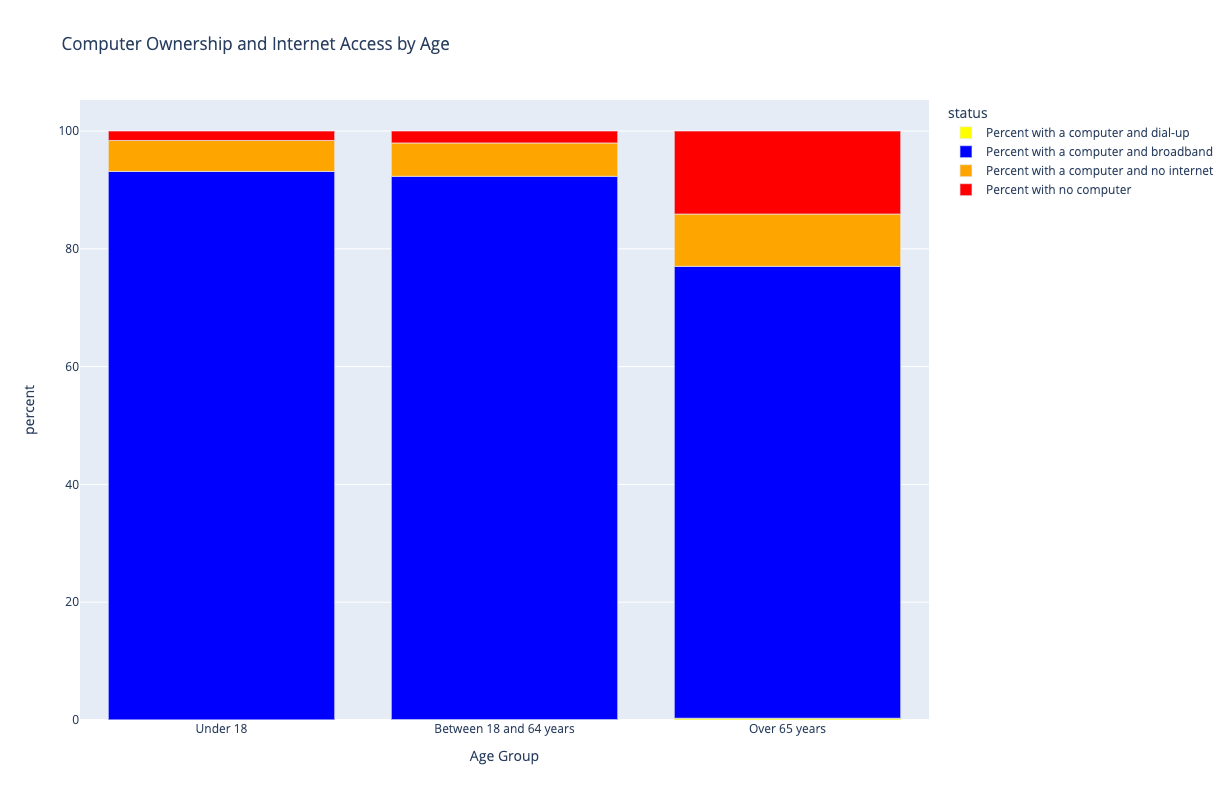

In [34]:
fig = px.bar(age,
             x = 'Age Group',
             y = 'percent',
             width=800,
             height=800,
             color = 'status',
             color_discrete_sequence = ['yellow','blue','orange','red'],
             title = 'Computer Ownership and Internet Access by Age',
)
fig.show()

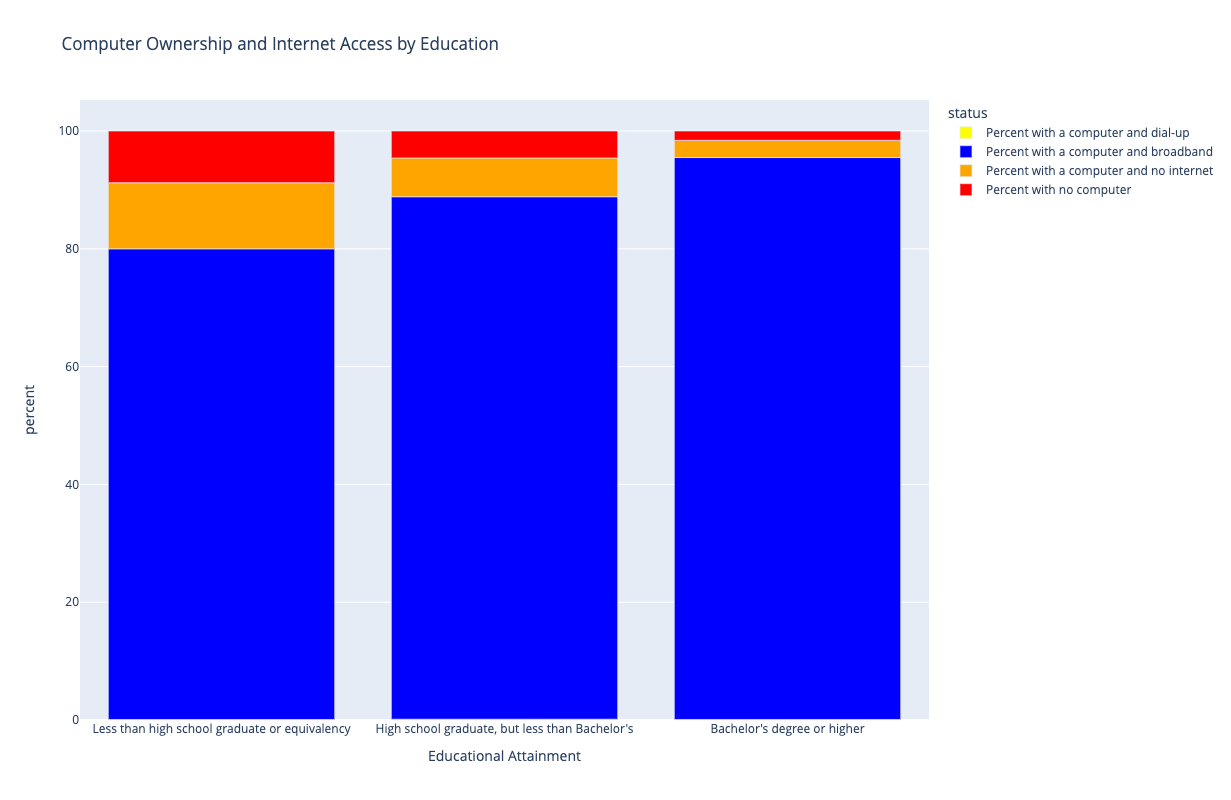

In [35]:
fig = px.bar(educ,
             x = 'Educational Attainment',
             y = 'percent',
             width=800,
             height=800,
             color = 'status',
             color_discrete_sequence = ['yellow','blue','orange','red'],
             title = 'Computer Ownership and Internet Access by Education',
)
fig.show()

In [36]:
#Currently I do not intended to normalize the race variable to demonstrate the magnitude of digital exclusion between groups. To do this, I need to change the data type for counts:
race['count']=race['count'].astype(int)
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   race    20 non-null     object
 1   status  20 non-null     object
 2   count   20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


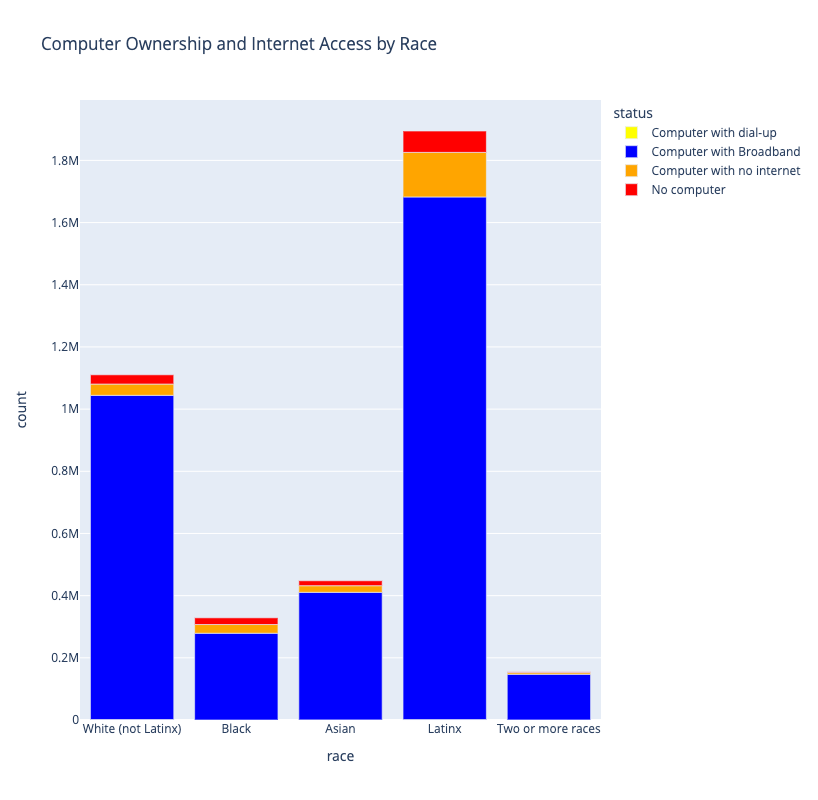

In [95]:
fig = px.bar(race,
             x = 'race',
             y = 'count',
             width = 800,
             height = 800,
             color = 'status',
             color_discrete_sequence = ['yellow','blue','orange','red'],
             title = 'Computer Ownership and Internet Access by Race',
)
fig.show()

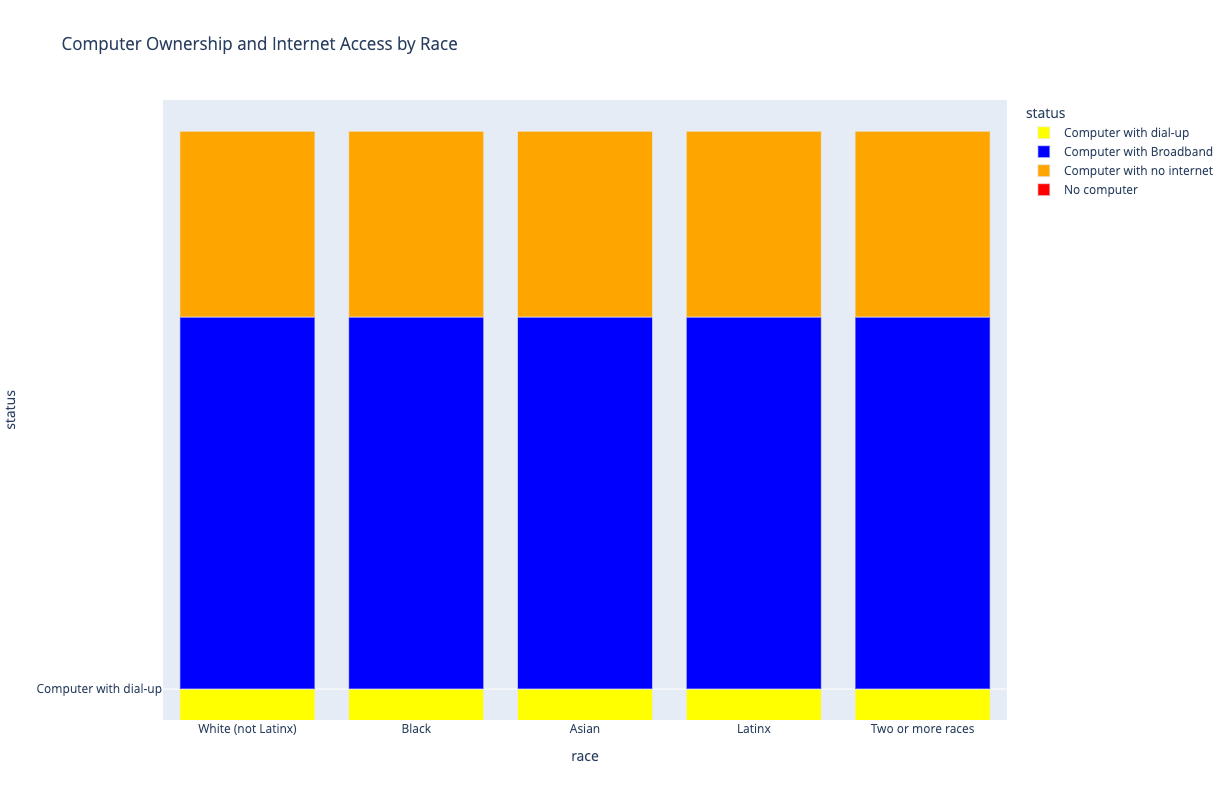

In [90]:
fig = px.bar(race,
             x = 'race',
             y = 'status',
             width = 800,
             height = 800,
             color = 'status',
             color_discrete_sequence = ['yellow','blue','orange','red'],
             title = 'Computer Ownership and Internet Access by Race',
)
fig.show()

### Mapping Internet Access

<AxesSubplot:>

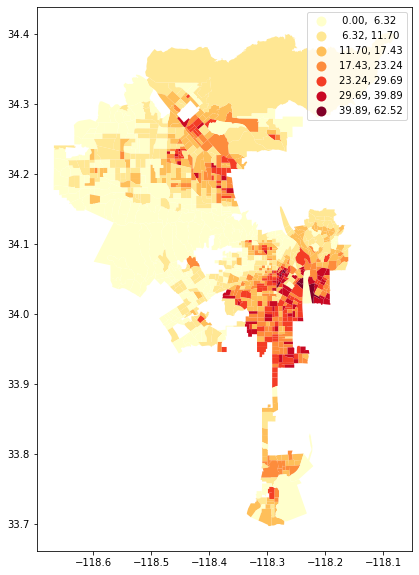

In [38]:
#Let's map some data!
hh.plot(figsize=(20,10),
        column = 'Percent with no internet access', 
        legend = True,
        scheme='naturalbreaks',
        cmap = 'YlOrRd',
        k=7)

In [39]:
#let's kick it up a notch
hh_web_mercator = hh.to_crs(epsg=3857)                      

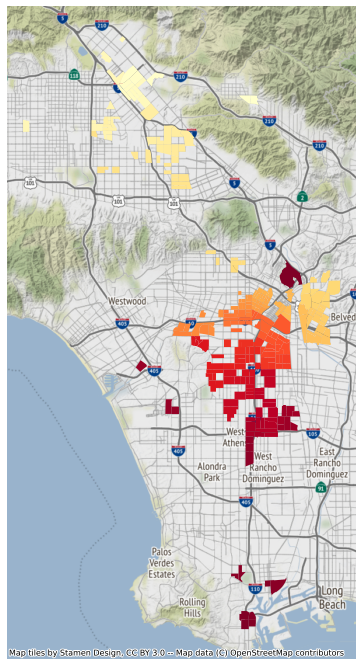

In [40]:
fig, ax = plt.subplots(figsize = (20, 12))
hh_web_mercator[hh_web_mercator['Percent with no internet access']>20].plot(ax=ax, scheme = 'naturalbreaks', cmap = 'YlOrRd', k=7)
ax.axis('off')
ctx.add_basemap(ax)

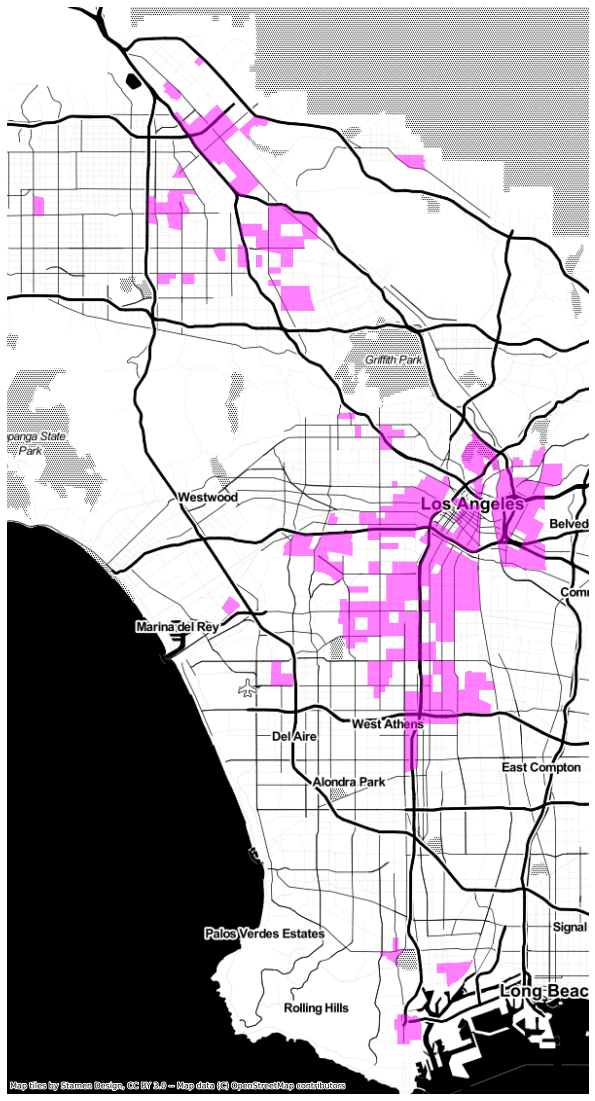

In [94]:
fig, ax = plt.subplots(figsize = (20, 20))
hh_web_mercator[hh_web_mercator['Percent with no internet access']>20].plot(ax=ax, color = '#ff00ff', alpha=0.5)
ax.axis('off')
ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner)

### Plotting Library Locations

In [42]:
#About ready to scream...Dealing with this later
#fig, ax = plt.scatter(x='lat', y='lon')

### Open Street Maps

In [43]:
#I will do a trial of the isochrom map from the LA Central library Branch
#first, configure that place, network type, trip times and trvael speed for a walking map
center_point = (34.0504,-118.2555)
network_type = 'walk'
trip_times = [5, 15, 30]
meters_per_minute = 75

In [44]:
%%time
G = ox.graph_from_point(center_point, network_type=network_type)

CPU times: user 3.25 s, sys: 102 ms, total: 3.35 s
Wall time: 3.36 s


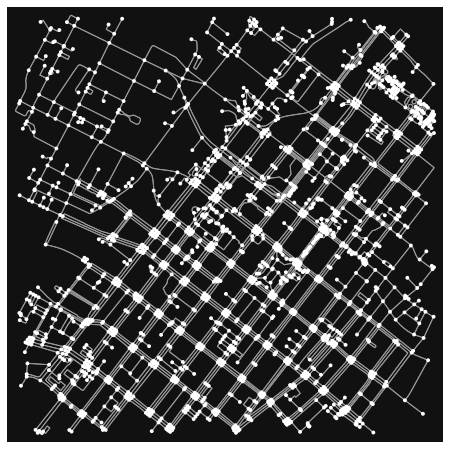

In [45]:
fig, ax = ox.plot_graph(G)

In [46]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [47]:
#convert nodes and edges to geodataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [48]:
gdf_nodes.sample(10)

y             x   highway  street_count         lon  \
osmid                                                                        
3596007788  4.034693e+06 -1.316370e+07  crossing             4 -118.251494   
2817343427  4.035536e+06 -1.316434e+07       NaN             4 -118.257261   
3215824670  4.035419e+06 -1.316383e+07       NaN             4 -118.252684   
6731580983  4.036228e+06 -1.316478e+07       NaN             3 -118.261200   
1738802894  4.035029e+06 -1.316331e+07       NaN             4 -118.248066   
6805301213  4.034519e+06 -1.316485e+07       NaN             3 -118.261896   
8423947763  4.035289e+06 -1.316485e+07       NaN             3 -118.261895   
3255610670  4.036697e+06 -1.316328e+07  crossing             4 -118.247781   
6726989716  4.034470e+06 -1.316349e+07       NaN             3 -118.249602   
9035768760  4.035828e+06 -1.316430e+07       NaN             1 -118.256947   

                  lat                           geometry  
osmid                                                     
3596007788  34.043858  POINT (-13163696.142 4034692.565)  
2817343427  34.050139  POINT (-13164338.044 4035536.484)  
3215824670  34.049262  POINT (-13163828.579 4035418.588)  
6731580983  34.055285  POINT (-13164776.509 4036227.855)  
1738802894  34.046364  POINT (-13163314.506 4035029.292)  
6805301213  34.042569  POINT (-13164853.998 4034519.409)  
8423947763  34.048298  POINT (-13164853.898 4035289.059)  
3255610670  34.058777  POINT (-13163282.802 4036697.128)  
6726989716  34.042200  POINT (-13163485.481 4034469.837)  
9035768760  34.052307  POINT (-13164303.101 4035827.756)

<AxesSubplot:>

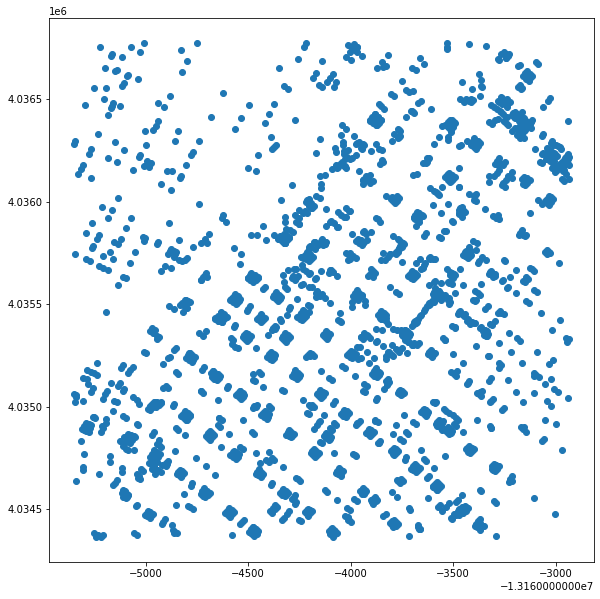

In [49]:
gdf_nodes.plot (figsize=(10,10))

In [50]:
stats = ox.basic_stats(G, circuity_dist='euclidean')
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning:

The `circuity_dist` argument has been deprecated and will be removed in a future release.



{'n': 2076,
 'm': 6562,
 'k_avg': 6.321772639691715,
 'edge_length_total': 277308.9640000002,
 'edge_length_avg': 42.25982383419692,
 'streets_per_node_avg': 3.226878612716763,
 'streets_per_node_counts': {0: 0, 1: 277, 2: 0, 3: 790, 4: 994, 5: 14, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13342967244701348,
  2: 0.0,
  3: 0.3805394990366089,
  4: 0.47880539499036606,
  5: 0.00674373795761079,
  6: 0.0004816955684007707},
 'intersection_count': 1799,
 'street_length_total': 138654.48199999979,
 'street_segment_count': 3281,
 'street_length_avg': 42.25982383419682,
 'circuity_avg': 0.8638343149246476,
 'self_loop_proportion': 0.001828710758914965}

In [51]:
#get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13165349.225457974
4034364.472519913
-13162935.184376476
4036774.739681407


In [52]:
#calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13164142.204917226
4035569.60610066


In [53]:
#find the nearest node
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 4632585779


In [54]:
gdf_nodes.loc[[center_node]]

y             x highway  street_count         lon  \
osmid                                                                      
4632585779  4.035566e+06 -1.316416e+07     NaN             1 -118.255681   

                  lat                           geometry  
osmid                                                     
4632585779  34.050356  POINT (-13164162.181 4035565.586)

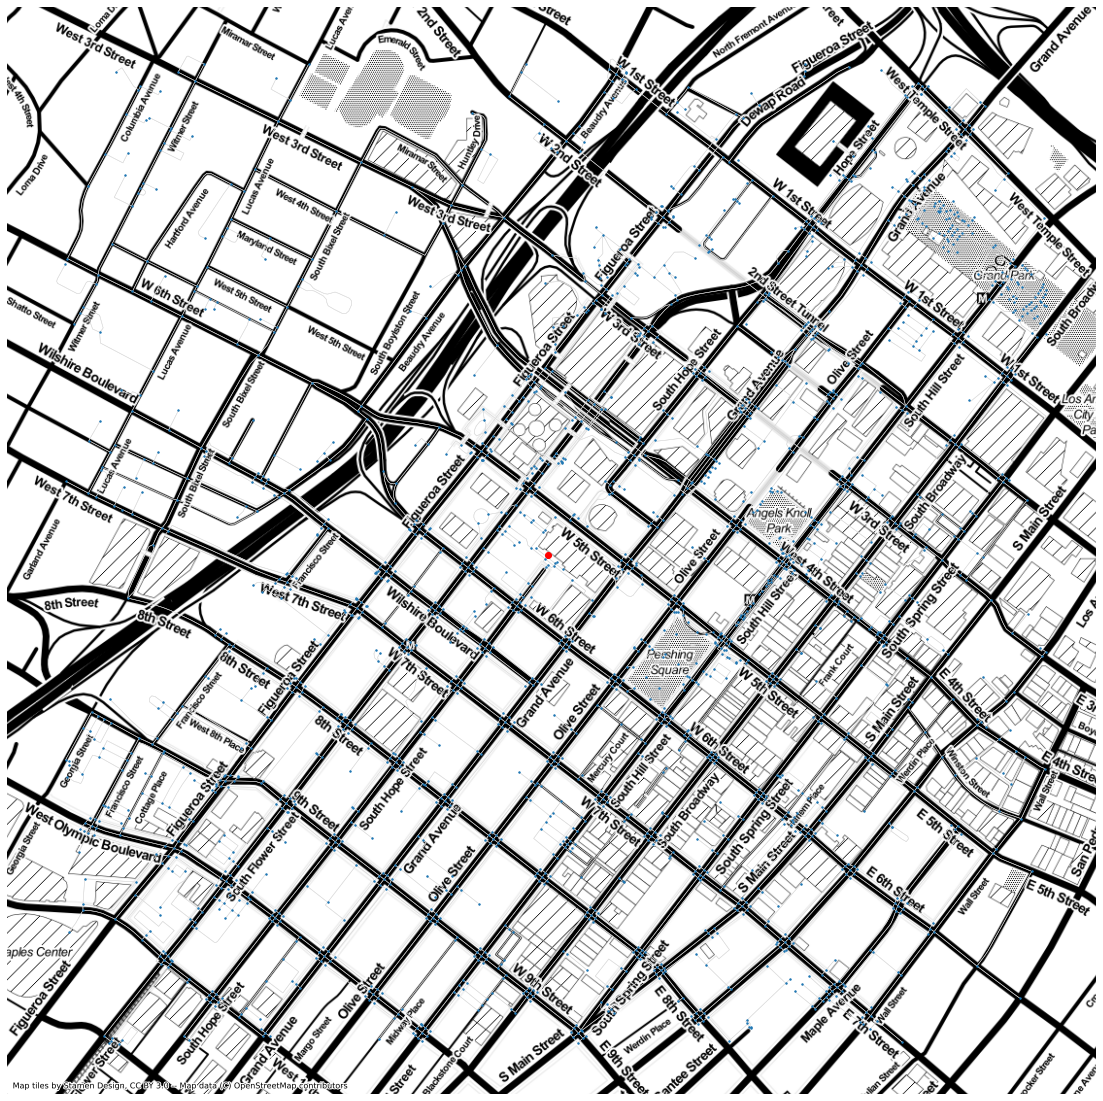

In [55]:
#Begin mapping the network layers
fig, ax = plt.subplots (figsize=(20,20))

gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro',
               zorder=10)

gdf_nodes.plot(ax=ax,
               markersize=2,
               zorder=20)

gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color = 'r',
                                  zorder=30)

ax.axis('off')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner)

In [56]:
#start calculating the travel cost to build the isochrome
gdf_edges[['osmid','name','highway','length']].sample(5)

osmid             name  highway  \
u          v          key                                                     
3297494625 3215839086 0                 322953657              NaN  footway   
671847461  4888781339 0                 120374537              NaN  footway   
8421237217 3596007789 0    [438255393, 399270702]  East 7th Street  primary   
3898602959 3898602976 0                 386517752              NaN  footway   
2820039367 3698094197 0                 277498506              NaN  footway   

                           length  
u          v          key          
3297494625 3215839086 0    15.549  
671847461  4888781339 0    46.498  
8421237217 3596007789 0    49.047  
3898602959 3898602976 0    10.488  
2820039367 3698094197 0     7.659

In [57]:
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

In [58]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

osmid  \
u          v          key                                                 
8376376555 8376376604 0                                       285298329   
123137996  122641714  0    [399276082, 399276083, 399276084, 399276085]   
2889674346 2889674343 0                                       285293531   
3144600715 8385752740 0                                       285297491   
122641674  2802660763 0                                        13295214   
8873363305 6817527874 0               [405180177, 405169155, 405169157]   
2814375256 2814375257 0                                       766591611   
122641720  123396105  0                                        13415337   
3663693326 2817343428 0                                       277499721   
3151976055 33078916   0                                       358727539   

                                         name      highway   length  walk_time  
u          v          key                                                       
8376376555 8376376604 0                   NaN      footway   32.351   0.431347  
123137996  122641714  0    South Bixel Street     tertiary  222.553   2.967373  
2889674346 2889674343 0                   NaN      footway   94.557   1.260760  
3144600715 8385752740 0                   NaN      footway   66.572   0.887627  
122641674  2802660763 0        Lebanon Street      service    9.526   0.127013  
8873363305 6817527874 0    West Temple Street    secondary  110.934   1.479120  
2814375256 2814375257 0                   NaN      footway  100.578   1.341040  
122641720  123396105  0       Columbia Avenue  residential  156.482   2.086427  
3663693326 2817343428 0                   NaN      footway   10.288   0.137173  
3151976055 33078916   0       West 2nd Street    secondary  113.886   1.518480

In [59]:
#begin to visualize the isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 15, 30]
['#0d0887', '#cc4778', '#f0f921']


In [60]:
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[30, 15, 5]
['#0d0887', '#cc4778', '#f0f921']


In [61]:
time_color = list(zip(trip_times, iso_colors))
time_color

[(30, '#0d0887'), (15, '#cc4778'), (5, '#f0f921')]

In [62]:
#Let's loop!
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 30 minutes is #0d0887
The color for 15 minutes is #cc4778
The color for 5 minutes is #f0f921


In [63]:
#loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 1838 nodes within 30 minutes 
There are 385 nodes within 15 minutes 
There are 22 nodes within 5 minutes 


In [64]:
gdf_nodes['color'].fillna('#cccccc', inplace=True)

<AxesSubplot:>

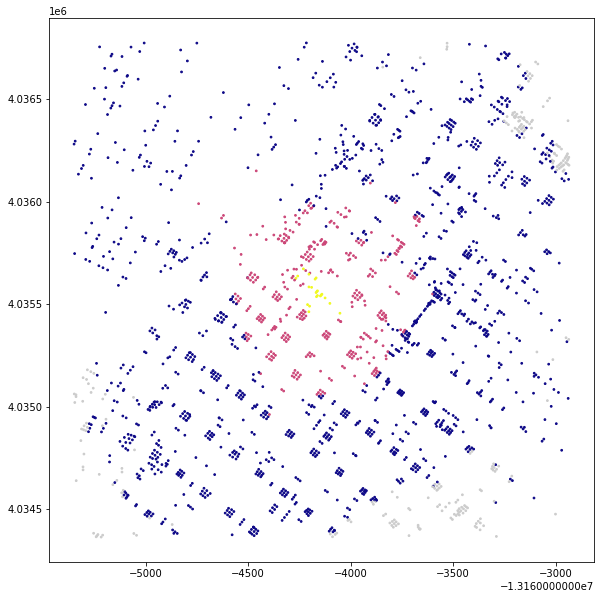

In [65]:
#mapping!
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

In [66]:
#Now I will being creating polygons for each time zone
gdf_5 = gdf_nodes[gdf_nodes['time']=='5 mins']

In [67]:
# dissolve the nodes by time
isochrones = gdf_nodes.dissolve("time")
isochrones

geometry             y  \
time                                                                       
15 mins  MULTIPOINT (-13164741.822 4035990.613, -131646...  4.035526e+06   
30 mins  MULTIPOINT (-13165349.225 4036281.251, -131653...  4.036374e+06   
5 mins   MULTIPOINT (-13164267.356 4035626.193, -131642...  4.035463e+06   

                    x          highway  street_count         lon        lat  \
time                                                                          
15 mins -1.316456e+07  traffic_signals             4 -118.259253  34.050061   
30 mins -1.316351e+07  traffic_signals             4 -118.249821  34.056371   
5 mins  -1.316420e+07             None             3 -118.256057  34.049596   

           color  
time              
15 mins  #cc4778  
30 mins  #0d0887  
5 mins   #f0f921

In [68]:
isochrones = isochrones.convex_hull.reset_index()
isochrones

time                                                  0
0  15 mins  POLYGON ((-13164396.509 4034962.440, -13164741...
1  30 mins  POLYGON ((-13164470.970 4034371.458, -13164862...
2   5 mins  POLYGON ((-13164052.487 4035456.369, -13164204...

In [69]:
isochrones.columns=['time','geometry']

<AxesSubplot:>

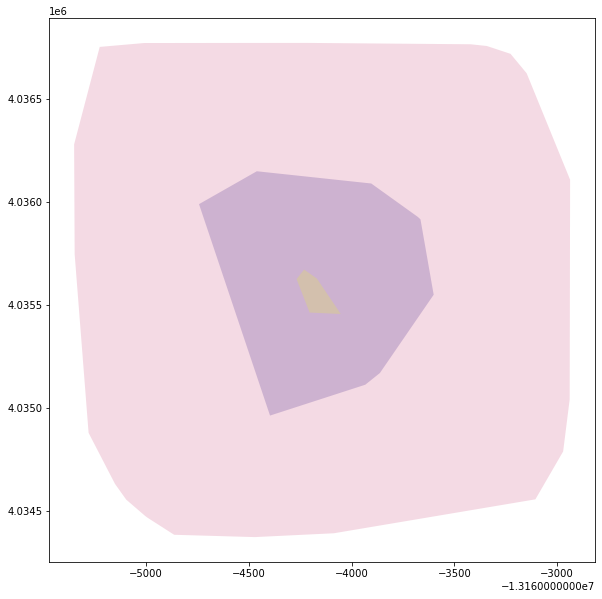

In [70]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

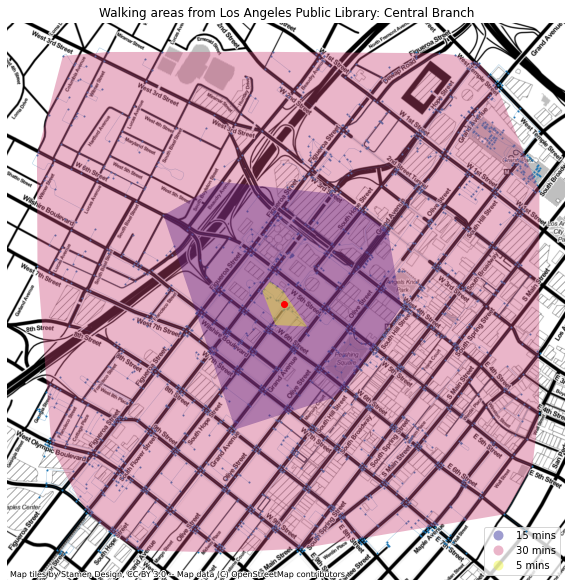

In [71]:
fig, ax = plt.subplots(figsize=(10,15))

isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

ax.axis('off')


ax.set_title('Walking areas from Los Angeles Public Library: Central Branch')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner)

In [72]:
#Now I will make a isochrone map for biking to the library
center_point = (34.0504,-118.2555)
network_type = 'bike'
trip_times = [15, 30]
meters_per_minute = 200

In [73]:
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 4632585779


In [74]:
gdf_edges['bike_time'] = gdf_edges['length']/meters_per_minute

In [75]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

osmid                 name  \
u          v          key                                               
6785616082 2889872760 0                 13313810        Cottage Place   
3299219866 3299219867 0                385445201                  NaN   
69238346   5336787595 0                604060339  South Spring Street   
122641711  304690393  0    [27747401, 399276125]      West 6th Street   
2889872793 3698094200 0                285316497                  NaN   
26666271   3661699896 0                404995538       South Broadway   
8243567527 68214615   0                608204516  South Spring Street   
26666275   3665206537 0                381246292      West 7th Street   
1837240570 3887914861 0                161688768      West 6th Street   
2889717984 8873833277 0                319505201                  NaN   

                             highway   length  walk_time  
u          v          key                                 
6785616082 2889872760 0      service   22.792   0.303893  
3299219866 3299219867 0      footway   10.085   0.134467  
69238346   5336787595 0      primary    8.637   0.115160  
122641711  304690393  0    secondary  109.707   1.462760  
2889872793 3698094200 0      footway   13.494   0.179920  
26666271   3661699896 0    secondary   11.302   0.150693  
8243567527 68214615   0      primary   99.235   1.323133  
26666275   3665206537 0      primary   11.929   0.159053  
1837240570 3887914861 0      primary   12.338   0.164507  
2889717984 8873833277 0      footway  108.519   1.446920

In [76]:
#begin to visualize the isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='cool', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[15, 30]
['#00ffff', '#ff00ff']


In [77]:
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[30, 15]
['#00ffff', '#ff00ff']


In [78]:
time_color = list(zip(trip_times, iso_colors))
time_color

[(30, '#00ffff'), (15, '#ff00ff')]

In [79]:
#loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 1838 nodes within 30 minutes 
There are 385 nodes within 15 minutes 


In [80]:
gdf_nodes['color'].fillna('#cccccc', inplace=True)

<AxesSubplot:>

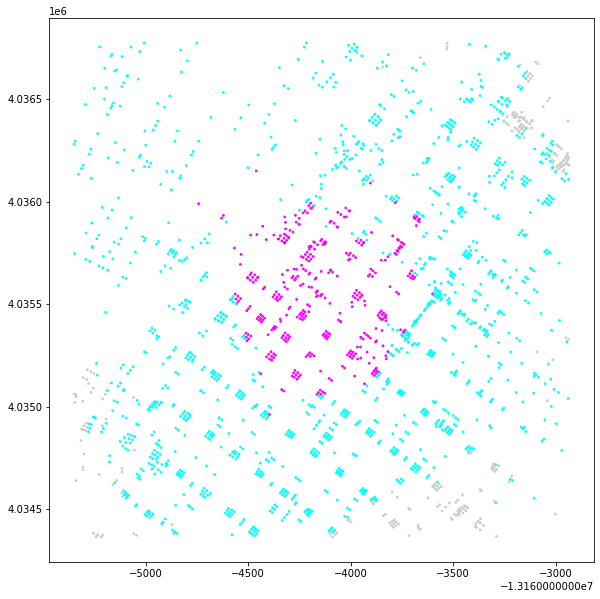

In [81]:
#mapping!
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

In [82]:
#Now I will being creating polygons for each time zone
gdf_15 = gdf_nodes[gdf_nodes['time']=='15 mins']

In [83]:
# dissolve the nodes by time
isochrones = gdf_nodes.dissolve("time")
isochrones

geometry             y  \
time                                                                       
15 mins  MULTIPOINT (-13164741.822 4035990.613, -131646...  4.035526e+06   
30 mins  MULTIPOINT (-13165349.225 4036281.251, -131653...  4.036374e+06   

                    x          highway  street_count         lon        lat  \
time                                                                          
15 mins -1.316456e+07  traffic_signals             4 -118.259253  34.050061   
30 mins -1.316351e+07  traffic_signals             4 -118.249821  34.056371   

           color  
time              
15 mins  #ff00ff  
30 mins  #00ffff

In [84]:
isochrones = isochrones.convex_hull.reset_index()
isochrones

time                                                  0
0  15 mins  POLYGON ((-13164396.509 4034962.440, -13164741...
1  30 mins  POLYGON ((-13164470.970 4034371.458, -13164862...

In [85]:
isochrones.columns=['time','geometry']

<AxesSubplot:>

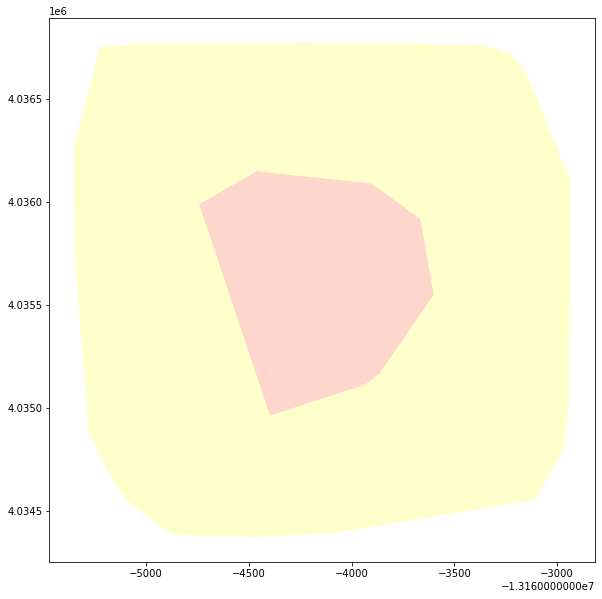

In [86]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='spring')

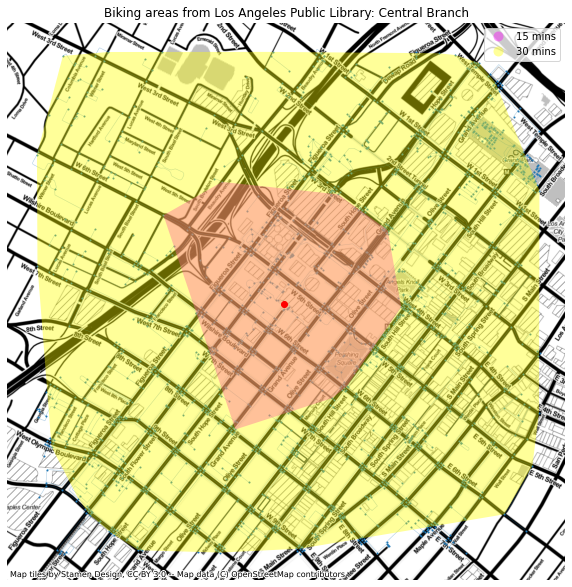

In [87]:
ig, ax = plt.subplots(figsize=(10,15))

isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='spring', 
                legend=True,
                zorder=20)

gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

ax.axis('off')


ax.set_title('Biking areas from Los Angeles Public Library: Central Branch')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner)